<a href="https://colab.research.google.com/github/Sudharshana-HG/Assignment-1-Basic-Statistics-Level-1/blob/main/Decision_Tree_C5_0_CART_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
# import some data to play with
iris = pd.read_csv('/content/iris.csv')

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [9]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [11]:
iris['Species'].unique()

array([0, 1, 2])

In [12]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
colnames = list(iris.columns)
colnames

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [15]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:

model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

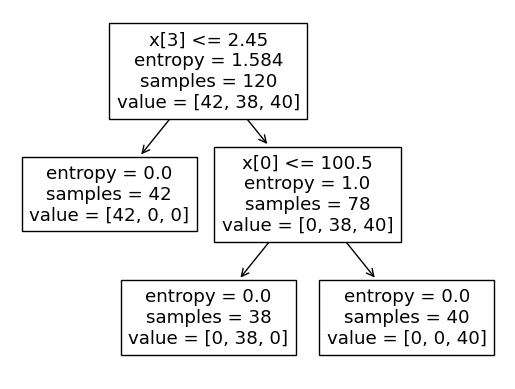

In [18]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [19]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

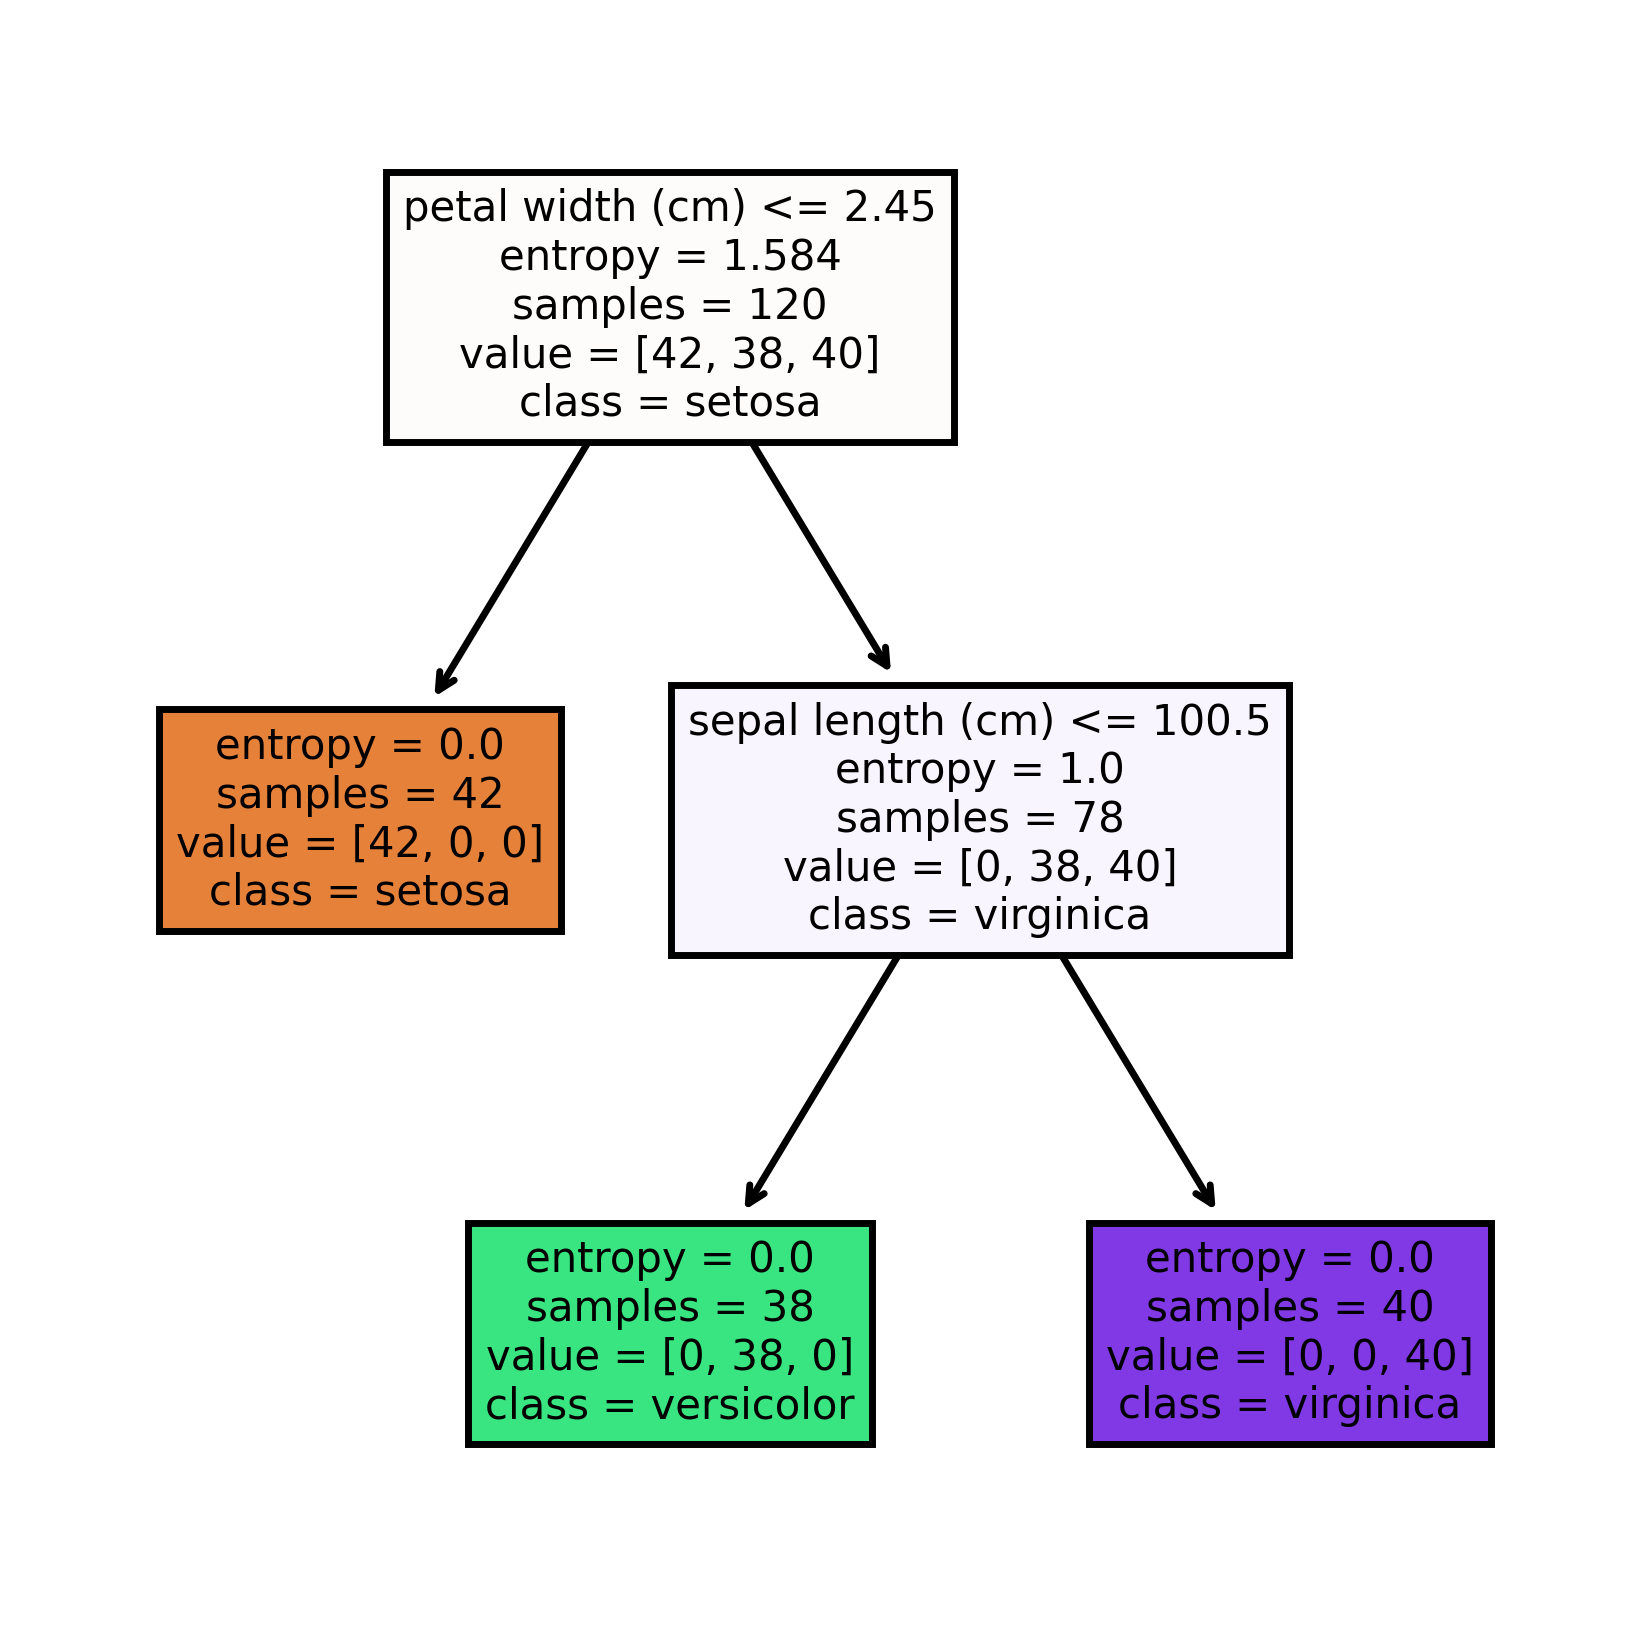

In [20]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] #.columns
cn=['setosa', 'versicolor', 'virginica']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [22]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [23]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [25]:
preds,y_test

(array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
        1, 0, 1, 0, 0, 2, 0, 1]),
 38     0
 66     1
 115    2
 117    2
 89     1
 136    2
 68     1
 94     1
 84     1
 28     0
 90     1
 11     0
 40     0
 126    2
 79     1
 144    2
 123    2
 124    2
 76     1
 59     1
 132    2
 105    2
 53     1
 17     0
 64     1
 18     0
 13     0
 116    2
 9      0
 81     1
 Name: Species, dtype: int64)

In [26]:
# Accuracy 
from sklearn.metrics import accuracy_score

np.mean(preds==y_test),accuracy_score(y_test,preds)

(1.0, 1.0)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [28]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

#### Decision Tree Regression Example

In [30]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [31]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:

#Find the accuracy
model.score(X_test,y_test)

0.9568143399355724